In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

X = np.random.uniform(low=0, high=1, size=(1000, 2))
epsilon = np.random.normal(0, 1, 1000)

y = 3 * X[:, 0] + 5 * X[:, 1] + 3 + epsilon

print(y.shape)
X = np.c_[np.ones(X.shape[0]), X]
y = np.expand_dims(y, axis= 1)
X


(1000,)


array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       ...,
       [1.        , 0.75137509, 0.65695516],
       [1.        , 0.95661462, 0.06895802],
       [1.        , 0.05705472, 0.28218707]])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 3), (300, 3), (700, 1), (300, 1))

array([[3.11861685],
       [2.95560358],
       [4.83519592]])

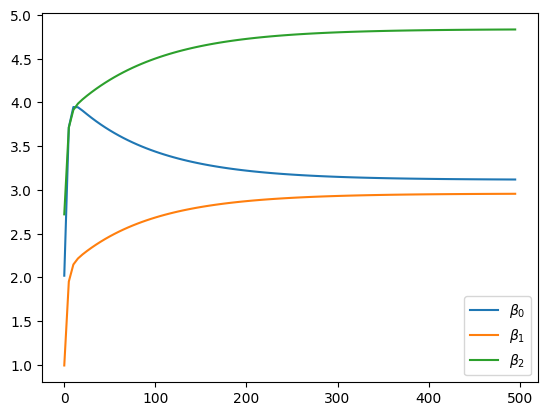

In [4]:
np.random.seed(472)
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1) # Här är felet! Denna randomiseras bara en gång 
    

    beta_0_list, beta_1_list, beta_2_list, steps = [], [], [], []

    for i in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
        if i % 5 == 0:

            beta_0_list.append(theta[0][0])
            beta_1_list.append(theta[1][0])
            beta_2_list.append(theta[2][0])
            steps.append(i)

    return theta, beta_0_list, beta_1_list, beta_2_list, steps

theta, beta_0_list, beta_1_list, beta_2_list, steps = gradient_descent(X, y, epochs = 500)

fig, ax = plt.figure(), plt.axes()
ax.plot(steps, beta_0_list, label= r"$\beta_0$")
ax.plot(steps, beta_1_list, label= r"$\beta_1$")
ax.plot(steps, beta_2_list, label= r"$\beta_2$")
ax.legend()

theta

In [5]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        
        theta -= learning_rate * gradient

    return theta


theta_hat = gradient_descent(X, y, learning_rate=0.1, epochs=500)

theta_hat

array([[3.12084781],
       [2.95397893],
       [4.83261321]])

<Axes: >

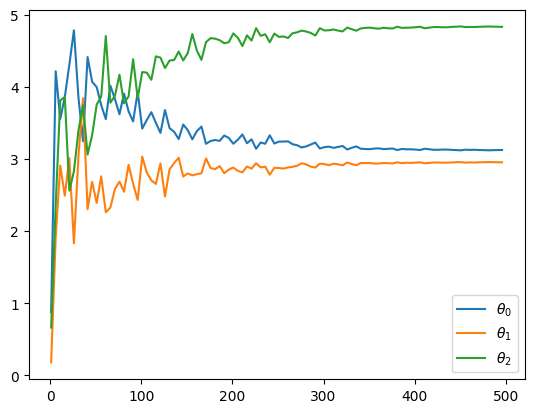

In [6]:
theta_0 = []
theta_1 = []
theta_2 = []

steps = range(1, 500, 5)

for i in steps:

    theta_hat = gradient_descent(X, y, learning_rate= 0.1, epochs= i)

    theta_0.append(float(theta_hat[0]))
    theta_1.append(float(theta_hat[1]))
    theta_2.append(float(theta_hat[2]))


sns.lineplot(x= steps, y= theta_0, label= r"$\theta_0$")
sns.lineplot(x= steps, y= theta_1, label= r"$\theta_1$")
sns.lineplot(x= steps, y= theta_2, label= r"$\theta_2$")



<Axes: >

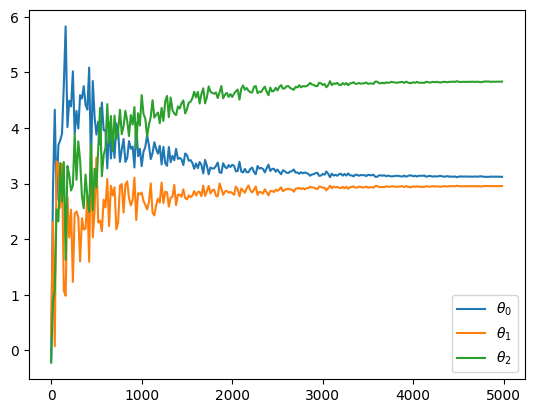

In [7]:
theta_0 = []
theta_1 = []
theta_2 = []

steps = range(1, 5000, 20)

for i in steps:

    theta_hat = gradient_descent(X, y, learning_rate= 0.01, epochs= i)

    theta_0.append(float(theta_hat[0]))
    theta_1.append(float(theta_hat[1]))
    theta_2.append(float(theta_hat[2]))


sns.lineplot(x= steps, y= theta_0, label= r"$\theta_0$")
sns.lineplot(x= steps, y= theta_1, label= r"$\theta_1$")
sns.lineplot(x= steps, y= theta_2, label= r"$\theta_2$")

In [44]:

 # Learning schedule hyperparameters

def learning_rate_schedule(t, t0 = 5, t1 = 50):
    """Decays the learning rate as traning progressess"""
    return t0 / (t + t1)




def SGD(X, y, epochs = 10):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index : random_index + 1]
            y_i = y[random_index : random_index + 1]

            gradient = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
            eta = learning_rate_schedule(epoch*m+i) # to have large steps in beginning and decaying it towards the end
            theta -= eta*gradient
    return theta

SGD(X_train, y_train)

thetas = [SGD(X_train, y_train, epochs=n) for n in range(50)]

theta_0_list, theta_1_list, theta_2_list = [], [], []

for array in thetas:
    theta_0_list.append(array[0])
    theta_1_list.append(array[1])
    theta_2_list.append(array[2])


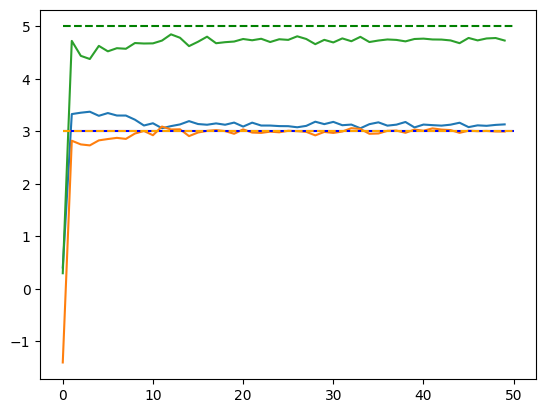

In [45]:
epochs = 50
plt.plot(theta_0_list)
plt.plot(theta_1_list)
plt.plot(theta_2_list)
plt.hlines(3, 0, epochs, color = "blue")
plt.hlines(3, 0, epochs, linestyles = "--", color = "orange")
plt.hlines(5, 0, epochs, linestyles = "--", color = "green")

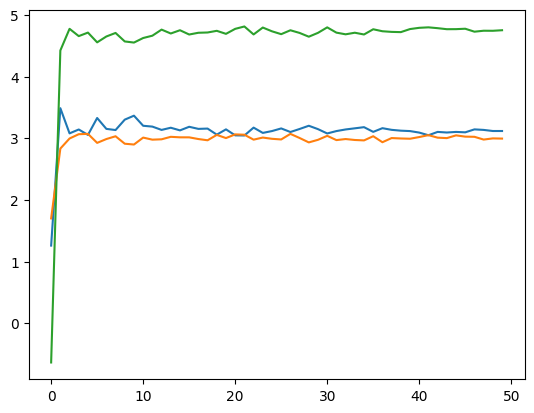